## Vous êtes le patron d'une usine de composants électroniques
Vous voulez prédire si un composant est capable de passer des tests de qualité
Le dataset est composé de 2 features X1 et X2 et d'une variable cible binaire Y = 0/1

### 1. Visualisez les données
en représentant graphiquement les features et les Y
dans le plan. Bien sûr, il faut tenir compte que les features sont continues
et la variable Y est binaire (catégorielle pour cette représentation graphique)

In [ ]:
# REPONSE :

In [2]:
# Création de la matrice et de la dataframe
import numpy as np
mat_for_regularized_reg_log=np.loadtxt("data_for_regularized_reg_log.txt", delimiter=',')
import pandas as pd
df_for_regularized_reg_log = pd.DataFrame(data=mat_for_regularized_reg_log, columns=['X1','X2','Y'])

# Ou on peut obtenir directement le dataframe avec "read_csv" :
# df_for_regularized_reg_log = pd.read_csv("data_for_regularized_reg_log.txt", names = ['X1','X2','Y'])

In [3]:
df_for_regularized_reg_log.head()

,X1,X2,Y
0,0.051267,0.69956,1.0
1,-0.092742,0.68494,1.0
2,-0.213710,0.69225,1.0
3,-0.375000,0.50219,1.0
4,-0.513250,0.46564,1.0


In [4]:
df_for_regularized_reg_log.describe()

,X1,X2,Y
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


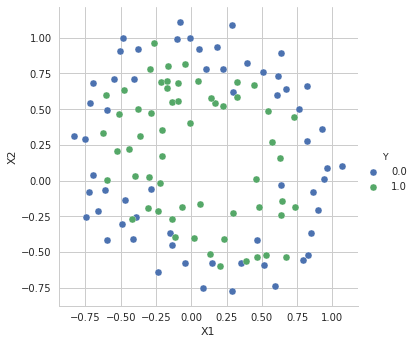

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid",color_codes=True)
# sns.set(style="whitegrid")
sns.pairplot(x_vars="X1", y_vars="X2", hue="Y", data=df_for_regularized_reg_log,size=5)

### 2. Comment peut-on séparer les Y = 0 versus Y = 1 ?

In [7]:
# REPONSE : cf cours on pourrait séparer les Y = 0 et Y = 1 
# observés par une droite s'il s'agissait d'un lien linéaire du type :

$h_{\theta}(x) =  g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2})$

In [8]:
# Il va falloir approcher le nuage différemment
# On parle de "séparation" de type non linéaire !
# On va essayer de séparer les groupes de valeurs Y = 0 vs Y = 1 
# grâce à une fonction un peu complexe de type polynômes faisant intervenir x1 et x2
# et d'un degré d à choisir

#### Ci-dessous les modèles que l'on pourrait utiliser pour les degrés 1, 2, 3 et 4:
$h_{\theta}(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2)$

$h_{\theta}(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_2^2 + \theta_5x_5^2)$

$h_{\theta}(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2 + \theta_5x_2^2
+ \theta_6x_1^2x_2 + \theta_7x_1x_2^2 + \theta_8x_2^3 + \theta_9x_2^3)$

$h_{\theta}(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2 + \theta_5x_2^2
+ \theta_6x_1^2x_2 + \theta_7x_1x_2^2 + \theta_8x_1^3 + \theta_9x_2^3 + \theta_{10}x_1^3x_2 + \theta_{11}x_1x_2^3
+ \theta_{12}x_1^4 + \theta_{13}x_2^4)$

### 3. Construisons des features de manière à "fitter" les données
On va utiliser des termes polynomiaux de degré 6 en x1 et x2
qui vont être des features pour le modèle

### Le modèle va s'écrire :
$h_{\theta}(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2 + \theta_5x_2^2
+ \theta_6x_1^2x_2 + \theta_7x_1x_2^2 + \theta_8x_1^3 + \theta_9x_2^3 + \theta_{10}x_1^3x_2 + \theta_{11}x_1x_2^3
+ \theta_{12}x_1^4 + \theta_{13}x_2^4 + \theta_{14}x_1^4x_2 + \theta_{15}x_1x_2^4 +  ...  + \theta_{26}x_1^6 + \theta_{27}x_2^6)$

### 3.1 Combien cela va faire de features ?


In [9]:
# REPONSE:
# - si on tient compte de la feature "fictive" (colonne des 1's), 28 features
# - sinon 27 features

#### Compléments mathématiques de cette réponse :
#### Par récurrence, démontrons quel est le nombre de features en fonction du degré d du polynôme utilisé.
Soit $d$ le degré du polynôme.
Le nombre de features, c'est le nombre de termes de la forme : $x_{1}^{p_1}x_{2}^{p_2}$ avec $p_1 + p_2 \leq d$
que l'on peut construire. 

Remarque : on tient compte de la feature "fictive" lorsque $p_{1} = p_{2} = 0$

Si $d = 1$ : 
- pour $p_{1} = 0$, $p_{2} = 0, 1$, soit 2 features
- pour $p_{1} = 1$, $p_{2} = 0$, soit 1 feature

Soit au total pour $d = 1$, $n_1 = 2 + 1 = 3$ features
    
Si $d = 2$ : 
- pour $p_{1} = 0$, $p_{2} = 0, 1, 2$, soit 3 features
- pour $p_{1} = 1$, $p_{2} = 0, 1$, soit 2 features
- pour $p_{1} = 2$, $p_{2} = 0$, soit 1 feature

Soit au total pour $d = 2$, $n_2 = 3 + 2 + 1 = 6$ features
    
Si $d = 3$ : 
- pour $p_{1} = 0$, $p_{2} = 0, 1, 2, 3$, soit 4 features
- pour $p_{1} = 1$, $p_{2} = 0, 1, 3$, soit  3 features
- pour $p_{1} = 2$, $p_{2} = 0, 1$, soit 2 features
- pour $p_{1} = 3$, $p_{2} = 0$, soit 1 feature

Soit au total pour $d = 3$, $n_3 = 4 + 3 + 2 + 1 = 10$ features

On remarque que pour un degré $d$ donné, le nombre de features est égal à :
    $n_d = (d+1) + d + (d-1) +  ...  + 1$
    
Il s'agit d'une somme de termes d'une suite arithmétique :
- de 1er terme = 1
- de raison $r$ = 1

Donc: $(d+1) + d + (d-1) + ... + 1 = \frac{(d+1)[1 + (d+1)]}{2}$ car c'est la somme de $d+1$ termes consécutifs de cette suite arithmétique

Par récurrence, supposons que si le degré du polynôme est $d$ et le nombre de features est égal à :
$\frac{(d+1)[1 + (d+1)]}{2}$

Alors si le polynôme est de degré $d+1$, le nombre de features $n_{d+1}$ est égal à :
$(d+2) + (d+1) + (d-1) + ... + 1 = \frac{(d+2)[1 + (d+2)]}{2}$


Ce qui démondre que si $d$ est le degré du polynôme, le nombre de features du modèle est : 
    
$n_d = \frac{(d+1)[1 + (d+1)]}{2}$
    
Et on retrouve que si d = 6, $n_6 = \frac{7(1 + 7)}{2} = \frac{56}{2} = 28$

Soit 28 features si le polynôme est de degré d = 6.

### 3.2 Construire la matrice X avec toutes les features

In [10]:
# REPONSE:
X1 = mat_for_regularized_reg_log[:,0]
X2 = mat_for_regularized_reg_log[:,1]

In [ ]:
# Exemple unitaire à tester !
# X1 = np.array([[2]])
# X2 = np.array([[3]])

In [ ]:
import numpy as np

def build_features(X1,X2,degre):
    
    X_with_features = np.ones((X1.shape[0],1))
    print (X_with_features.shape)
    for i in range(1,degre+1):
        for j in range(0,i+1):
            TEMP = (X1**(i-j))*(X2**j)
            TEMP = TEMP.reshape(TEMP.shape[0],1)
            X_with_features = np.append(X_with_features, TEMP, axis=1)
            print (X_with_features)
            
    return(X_with_features)
X_with_features = build_features(X1,X2,3)

In [11]:
# AUTRE CODE POSSIBLE !!!
import numpy as np
# X1 = np.array([[2]])
# X2 = np.array([[3]])
def build_features(X1,X2,degre):
    
#     X_with_features = np.ones((X1.shape[0],1))
    X_with_features = np.empty([1,1])

    for i in range(0,degre+1):
#         print ("i",i)
        j = 0
        while (i + j) <= degre:
#             print ("j",j)
            TEMP = (X1**(i))*(X2**j)
            TEMP = TEMP.reshape(TEMP.shape[0],1)
            if i + j == 0:
                X_with_features = TEMP
            else:
                X_with_features = np.append(X_with_features, TEMP, axis=1) 
#             print (X_with_features)
            j+= 1
#         print ("\n")
            
    return(X_with_features)
X_with_features = build_features(X1,X2,6)
X_with_features.shape

(118, 28)

In [12]:
X_with_features.shape
# a trouver : array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.]])

(118, 28)

In [ ]:
X_with_features[0,0:X_with_features.shape[1]]

### 4. Nous nous proposons de créer un modèle avec régularisation
### 4.1 Pour cela :
- implémenter la fonction de coût avec régularisation
- implémenter le fonction gradient avec régularisation

In [ ]:
# REPONSE: 

### Rappels:
- l'expression de la fonction de coût avec régularisation est :
$$J = \frac{−𝟏}{𝒎}[\sum_{𝒊=𝟏}^{𝒎}(𝒚^{(𝒊)}\log(𝒉_{𝜽}(𝒙^{(𝒊)}))  + (1 – 𝒚^{(𝒊)})\log(1 − 𝒉_{\theta}(𝒙^{(𝒊)}))] + \frac{\lambda}{2m}\sum_{j=𝟏}^{n}\theta_{j}^2$$ 
- l'expression du gradient avec régularisation s'écrit:
$$\frac{\partial J(\theta_{0},\theta_{1},...,\theta_{n})}{\partial \theta_{0}} = \frac{𝟏}{𝒎}\sum_{𝒊=𝟏}^{𝒎}(𝒉_{𝜽}(𝒙^{(𝒊)}) -  𝒚^{(𝒊)})x_{0}^{(i)}$$ 
$$j\ge 1, \frac{\partial J(\theta_{0},\theta_{1},...,\theta_{n})}{\partial \theta_{j}} = \frac{𝟏}{𝒎}\sum_{𝒊=𝟏}^{𝒎}(𝒉_{𝜽}(𝒙^{(𝒊)}) -  𝒚^{(𝒊)})x_{j}^{(i)} + \frac{\lambda}{m}\theta_j$$                                                

### 4.2 Utiliser la régularisation avec : $$\lambda = 1$$

### Utiliser l'algorithme d'optimisation "gradient conjugué" pour estimer les paramètres "theta"

In [13]:
# REPONSE:

# NB) X_with_features contient déjà la colonne des 1's

# On initialise THETA à zéro 
dim = 28 # car on a 28 features donc il y a un intercept + 27 autres paramètres à estimer

# mais ici on compte la colonne de 1's comme une feature !!!
THETA = np.zeros((dim,1))
# On définit la variable cible Y observée sur l'échantillon d'apprentissage
Y = mat_for_regularized_reg_log[:,2]

Y = Y.reshape(Y.shape[0],1)
Y.shape

(118, 1)

In [21]:
X_with_features.shape

(118, 28)

In [22]:
def fun_sigmoid(x):
    sigmoid_value = 1/(1 + np.exp(-x))
    return(sigmoid_value)

In [23]:
lambda_value = 1

def computeCostGradRegularized(THETA,X,Y,lambda_value):
    m = X.shape[0]    
    PRED = fun_sigmoid(np.dot(X,THETA))

    LAMBDA_GRAD = (lambda_value/m)*THETA
    LAMBDA_GRAD[0,0] = 0
    
    # Fonction de coût J
    J = ((-1)/m) * Y.T.dot(np.log(PRED)) + ((-1)/m) * np.dot((1 - Y).T, np.log(1 - PRED)) + (lambda_value/2*m)*np.sum(THETA**2,axis = 0) 
    
    GRAD = (1/m)*(X.T.dot(PRED - Y)) + LAMBDA_GRAD
    
    return (GRAD,J)
# Appliquer avec:
GRAD, J = computeCostGradRegularized(THETA,X_with_features,Y,lambda_value)

In [24]:
print ("La valeur de J initiale vaut : ", J)

La valeur de J initiale vaut :  [[ 0.69314718]]


In [25]:
%%time
# REPONSE :

import scipy.optimize as op

def initialize_to_zeros(dim):
    THETA = np.zeros((dim,1))
    return(THETA)

INITIAL_THETA = initialize_to_zeros(dim)

def computeCost(THETA,X,Y):
    THETA = THETA.reshape(THETA.shape[0],1)
    J = computeCostGradRegularized(THETA, X, Y,lambda_value)[1]
    return (J.ravel())

def computeGrad(THETA,X,Y):
    THETA = THETA.reshape(THETA.shape[0],1)
    GRAD = computeCostGradRegularized(THETA, X, Y,lambda_value)[0]
    return (GRAD.ravel())

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_tnc.html
# ATTENTION, les fonctions de coût et gradient
# utilisées par "op.fmin_tnc doivent être des 1D numpy.array !
# Idem pour le paramètre initial "theta"

# "op.fmin_tnc" renvoit en sortie un 1D numpy.array

THETA_RESULT = op.fmin_tnc(computeCost,INITIAL_THETA.ravel(), computeGrad, args=(X_with_features, Y))

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.88 ms


In [26]:
print ("Les paramètres estimés pour lambda = ",lambda_value, "sont:" ,THETA_RESULT[0])

Les paramètres estimés pour lambda =  1 sont: [  2.49642223e-04   2.77015868e-04  -2.48689386e-04  -2.03232570e-05
  -2.29977604e-04  -9.08332442e-05  -1.85528557e-04   1.37412086e-04
  -1.62449225e-04  -7.34919208e-05  -4.36568402e-05  -5.21231371e-05
  -1.78750595e-05  -4.35864210e-04  -7.16771356e-05  -1.31827328e-04
  -5.59544792e-05  -6.91289532e-05   3.40752511e-05  -1.49838910e-05
  -1.87923304e-05  -8.84416193e-07  -3.10561873e-04  -4.33024174e-05
  -6.54198245e-05  -3.43135194e-05   2.17303223e-06  -2.10980625e-04]


In [13]:
J = computeCostGradRegularized(THETA_RESULT[0].reshape(THETA_RESULT[0].shape[0],1), X_with_features, Y,lambda_value)[1]
J 

array([[ 0.69311828]])

### 5. Représenter graphiquement la prédiction obtenue par la séparation entre les valeurs observées Y = 0 versus Y = 1 

In [ ]:
# REPONSE :

# Représentons graphiquement l'ensemble des points (x1, x2, z) avec :

avec :

$z = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2 + \theta_5x_2^2
+ \theta_6x_1^2x_2 + \theta_7x_1x_2^2 + \theta_8x_1^3 + \theta_9x_2^3 + \theta_{10}x_1^3x_2 + \theta_{11}x_1x_2^3
+ \theta_{12}x_1^4 + \theta_{13}x_2^4 + \theta_{14}x_1^4x_2 + \theta_{15}x_1x_2^4 +  ...  + \theta_{26}x_1^6 + \theta_{27}x_2^6$

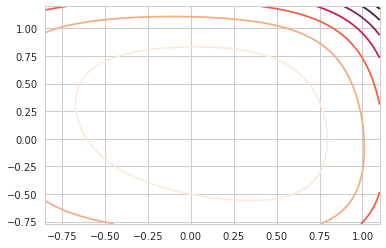

In [27]:
# del features

import matplotlib.pyplot as plt
nb_points = 100
# - un range de valeurs pour les x
# - un range de valeurs pour les y
all_x = np.linspace(-0.85,1.1,nb_points).reshape(nb_points,1)
all_y = np.linspace(-0.77,1.2,nb_points).reshape(nb_points,1)

Z_GRID = np.zeros((len(all_x),len(all_y)))

for i in range(0,len(all_x)):
    for j in range(0,len(all_y)):
            
        features = build_features(all_x[i],all_y[j],6)
        
        # C'est l'écriture matricielle des "z" de la cellule ci-dessus
        Z_GRID[i][j] = np.dot(features,THETA_RESULT[0].reshape(THETA_RESULT[0].shape[0],1))[0][0]
        
plt.contour(all_x.ravel(),all_y.ravel(),Z_GRID)

In [28]:
Z_GRID.shape

(100, 100)

Enfin, on trace les points (x1,x2,z) tels que :
avec :

$z = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2 + \theta_5x_2^2
+ \theta_6x_1^2x_2 + \theta_7x_1x_2^2 + \theta_8x_1^3 + \theta_9x_2^3 + \theta_{10}x_1^3x_2 + \theta_{11}x_1x_2^3
+ \theta_{12}x_1^4 + \theta_{13}x_2^4 + \theta_{14}x_1^4x_2 + \theta_{15}x_1x_2^4 +  ...  + \theta_{26}x_1^6 + \theta_{27}x_2^6$

Avec la contrainte  $ z= g^{-1}(0.5)$ et sachant que $g^{-1}(0.5) = 0$

Il s'agit donc des points (x1,x2) tels que :

$\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2 + \theta_5x_2^2
+ \theta_6x_1^2x_2 + \theta_7x_1x_2^2 + \theta_8x_1^3 + \theta_9x_2^3 + \theta_{10}x_1^3x_2 + \theta_{11}x_1x_2^3
+ \theta_{12}x_1^4 + \theta_{13}x_2^4 + \theta_{14}x_1^4x_2 + \theta_{15}x_1x_2^4 +  ...  + \theta_{26}x_1^6 + \theta_{27}x_2^6 = 0$


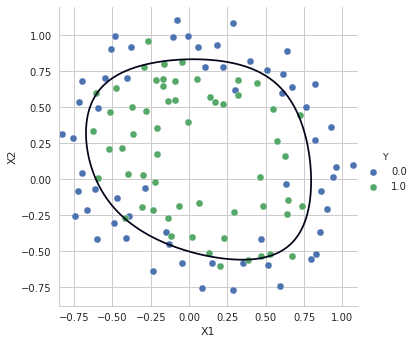

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid",color_codes=True)

sns.pairplot(x_vars="X1", y_vars="X2", hue="Y", data=df_for_regularized_reg_log,size=5)
plt.contour(all_x.ravel(),all_y.ravel(),Z_GRID,[-1e-6,1e6])

In [30]:
# Lorsque lambda = 1 :

# on constate que la courbe de séparation des points, sépare de manière assez "grossière" les points ayant comme valeurs observées
# Y = 1 des points ayant comme valeurs observées Y = 0 

### 5.3 Quel est le % d'observations correctement prédites ?

In [31]:
# REPONSE:
# ATTENTION: THETA_RESULT est un 1D numpy.array
PRED = fun_sigmoid(X_with_features.dot(THETA_RESULT[0].reshape(THETA_RESULT[0].shape[0],1)))
PRED_Y = np.zeros((PRED.shape[0],1))
i = 0
for pred in PRED.ravel():
    if pred >= 0.5:
        PRED_Y[i,0] = 1
    else:
        PRED_Y[i,0] = 0
    i+=1 # i = i + 1
    
# % d'observations correctement prédites sur l'échantillon d'apprentissage pour lambda = 1
(np.sum(PRED_Y == Y)/Y.shape[0])*100

80.508474576271183

### 6. Estimer les paramètres du modèle pour successivement :

- $\lambda = 0$
- $\lambda = 100$

### 7. Représenter graphiquement les séparations prédites pour chaque cas:

- $\lambda = 0$
- $\lambda = 100$

In [32]:
# REPONSE:
# On relance avec lambda = 0

lambda_value = 0

def computeCostGradRegularized(THETA,X,Y,lambda_value):
    m = X.shape[0]    
    PRED = fun_sigmoid(np.dot(X,THETA))

    LAMBDA_GRAD = (lambda_value/m)*THETA
    LAMBDA_GRAD[0,0] = 0
    
    # Fonction de coût J
    J = ((-1)/m) * Y.T.dot(np.log(PRED)) + ((-1)/m) * np.dot((1 - Y).T, np.log(1 - PRED)) + (lambda_value/2*m)*np.sum(THETA**2,axis = 0) 
    
    GRAD = (1/m)*(X.T.dot(PRED - Y)) + LAMBDA_GRAD
    
    return (GRAD,J)
# Appliquer avec:
GRAD, J = computeCostGradRegularized(THETA,X_with_features,Y,lambda_value)

In [33]:
print ("La valeur de J initiale vaut : ", J)

La valeur de J initiale vaut :  [[ 0.69314718]]


In [34]:
%%time
# REPONSE :
# https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
import scipy.optimize as op

def initialize_to_zeros(dim):
    THETA = np.zeros((dim,1))
    return(THETA)

INITIAL_THETA = initialize_to_zeros(dim)

def computeCost(THETA,X,Y):
    THETA = THETA.reshape(THETA.shape[0],1)
    J = computeCostGradRegularized(THETA, X, Y,lambda_value)[1]
    return (J.ravel())

def computeGrad(THETA,X,Y):
    THETA = THETA.reshape(THETA.shape[0],1)
    GRAD = computeCostGradRegularized(THETA, X, Y,lambda_value)[0]
    return (GRAD.ravel())


# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_tnc.html
# ATTENTION, les fonctions de coût et gradient
# utilisées par "op.fmin_tnc doivent être des 1D numpy.array !
# Idem pour le paramètre initial "theta"

# "op.fmin_tnc" renvoit en sortie un 1D numpy.array
THETA_RESULT = op.fmin_tnc(computeCost,INITIAL_THETA.ravel(), computeGrad, args=(X_with_features, Y))

CPU times: user 24 ms, sys: 4 ms, total: 28 ms
Wall time: 25.2 ms


In [35]:
J = computeCostGradRegularized(THETA_RESULT[0].reshape(THETA_RESULT[0].shape[0],1), X_with_features, Y,lambda_value)[1]
J 

array([[ 0.25535583]])

In [36]:
print ("Les paramètres estimés pour lambda = ",lambda_value, "sont:" ,THETA_RESULT[0])

Les paramètres estimés pour lambda =  0 sont: [   11.93948412     7.50631759   -38.84323658     5.64501221    31.25416394
   -15.64854291    -9.26585723    18.21938187   -76.8947949    -54.68804378
   230.04794088     8.39254033  -188.88317466  -127.78924908  -137.64273646
   495.07208509   184.47154666  -547.56980216  -156.53749941   483.89573686
   461.86763001  -849.05706255   482.98604487   460.19123024 -1156.83066421
   294.8272659   -875.28229616  -599.00576419]


In [37]:
PRED = fun_sigmoid(X_with_features.dot(THETA_RESULT[0].reshape(THETA_RESULT[0].shape[0],1)))
PRED_Y = np.zeros((PRED.shape[0],1))
i = 0
for pred in PRED.ravel():
    if pred >= 0.5:
        PRED_Y[i,0] = 1
    else:
        PRED_Y[i,0] = 0
    i+=1 # i = i + 1
    
# % d'observations correctement prédites sur l'échantillon d'apprentissage pour lambda = 0
(np.sum(PRED_Y == Y)/Y.shape[0])*100

86.440677966101703

In [26]:
# On constate que le % d'observations correctement prédites, du modèle est plus élevé (86.4 % pour lambda = 0 versus 80.5 % pour lambda = 1) sur l'échantillon d'apprentissage :
# le modèle fait du sur-apprentissage

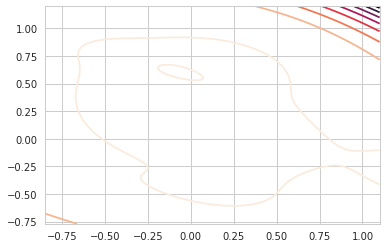

In [38]:
import matplotlib.pyplot as plt
nb_points = 100
# nb_points = 10
# - un range de valeurs pour les x
# - un range de valeurs pour les y
all_x = np.linspace(-0.85,1.1,nb_points).reshape(nb_points,1)
all_y = np.linspace(-0.77,1.2,nb_points).reshape(nb_points,1)

PRED_GRID = np.zeros((len(all_x),len(all_y)))

for i in range(0,len(all_x)):
    for j in range(0,len(all_y)):
            
        features = build_features(all_x[i],all_y[j],6)
        
        Z_GRID[i][j] = np.dot(features,THETA_RESULT[0].reshape(THETA_RESULT[0].shape[0],1))[0][0]
        
plt.contour(all_x.ravel(),all_y.ravel(),Z_GRID)

In [39]:
THETA.shape

(28, 1)

In [40]:
# Z_GRID

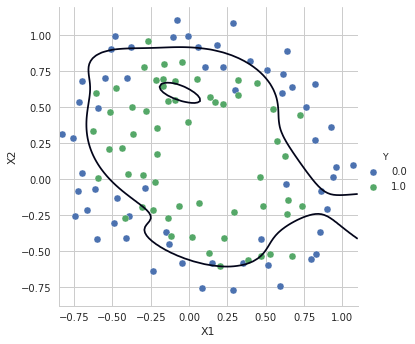

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid",color_codes=True)

sns.pairplot(x_vars="X1", y_vars="X2", hue="Y", data=df_for_regularized_reg_log,size=5)
plt.contour(all_x.ravel(),all_y.ravel(),Z_GRID,[-1e-6,1e6])

In [ ]:
# Lorsque lambda = 0 :

# on constate bien le sur-apprentissage car la courbe de séparation sépare de manière "fine" les points ayant comme valeurs observées
# Y = 1 des points ayant comme valeurs observées Y = 0

In [42]:
# On relance avec lambda = 100

lambda_value = 100

def computeCostGradRegularized(THETA,X,Y,lambda_value):
    m = X.shape[0]    
    PRED = fun_sigmoid(np.dot(X,THETA))

    LAMBDA_GRAD = (lambda_value/m)*THETA
    LAMBDA_GRAD[0,0] = 0
    
    # Fonction de coût J
    J = ((-1)/m) * Y.T.dot(np.log(PRED)) + ((-1)/m) * np.dot((1 - Y).T, np.log(1 - PRED)) + (lambda_value/2*m)*np.sum(THETA**2,axis = 0) 
      
    GRAD = (1/m)*(X.T.dot(PRED - Y)) + LAMBDA_GRAD
    
    return (GRAD,J)
# Appliquer avec:
GRAD, J = computeCostGradRegularized(THETA,X_with_features,Y,lambda_value)

In [43]:
%%time
# REPONSE :
# https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
import scipy.optimize as op

def initialize_to_zeros(dim):
    THETA = np.zeros((dim,1))
    return(THETA)

INITIAL_THETA = initialize_to_zeros(dim)

def computeCost(THETA,X,Y):
    THETA = THETA.reshape(THETA.shape[0],1)
    J = computeCostGradRegularized(THETA, X, Y,lambda_value)[1]
    return (J.ravel())

def computeGrad(THETA,X,Y):
    THETA = THETA.reshape(THETA.shape[0],1)
    GRAD = computeCostGradRegularized(THETA, X, Y,lambda_value)[0]
    return (GRAD.ravel())


# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_tnc.html
# ATTENTION, les fonctions de coût et gradient
# utilisées par "op.fmin_tnc doivent être des 1D numpy.array !
# Idem pour le paramètre initial "theta"

# "op.fmin_tnc" renvoit en sortie un 1D numpy.array
THETA_RESULT = op.fmin_tnc(computeCost,INITIAL_THETA.ravel(), computeGrad, args=(X_with_features, Y))

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 8.34 ms


In [44]:
J = computeCostGradRegularized(THETA_RESULT[0].reshape(THETA_RESULT[0].shape[0],1), X_with_features, Y,lambda_value)[1]
J 

array([[ 0.69314679]])

In [45]:
print ("Les paramètres estimés pour lambda = ",lambda_value, "sont:" ,THETA_RESULT[0])

Les paramètres estimés pour lambda =  100 sont: [  2.80288366e-07   1.19522604e-06  -4.35586912e-06  -2.56284679e-06
  -4.92172719e-06  -3.79087306e-06  -4.94728798e-06  -2.05609602e-06
  -1.70320403e-06  -1.10594211e-06  -4.57304774e-07  -6.32965549e-07
  -2.04808630e-07  -6.63748167e-06  -9.15885231e-07  -1.71675993e-06
  -7.65809042e-07  -9.74377950e-07  -2.21189076e-06  -2.99639813e-07
  -4.37902122e-07  -4.84926560e-08  -5.33382830e-06  -5.75500947e-07
  -8.63375667e-07  -2.56391922e-06  -1.32363083e-07  -4.21777893e-06]


In [46]:
# On constate que les coefficients "theta" deviennent très petits lorsque lambda vaut 100

In [47]:
# ATTENTION: THETA_RESULT est un 1D numpy.array
PRED = fun_sigmoid(X_with_features.dot(THETA_RESULT[0].reshape(THETA_RESULT[0].shape[0],1)))
PRED_Y = np.zeros((PRED.shape[0],1))
i = 0
for pred in PRED.ravel():
    if pred >= 0.5:
        PRED_Y[i,0] = 1
    else:
        PRED_Y[i,0] = 0
    i+=1 # i = i + 1
    
# % d'observations correctement prédites sur l'échantillon d'apprentissage pour lambda = 1
(np.sum(PRED_Y == Y)/Y.shape[0])*100

56.779661016949156

In [35]:
#  Le % d'observations correctement prédites, est descendu à 56.8  % lorsque lambda = 100

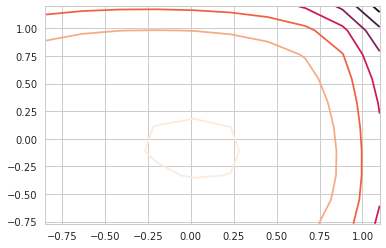

In [48]:
import matplotlib.pyplot as plt
nb_points = 10
# - un range de valeurs pour les x
# - un range de valeurs pour les y
all_x = np.linspace(-0.85,1.1,nb_points).reshape(nb_points,1)
all_y = np.linspace(-0.77,1.2,nb_points).reshape(nb_points,1)

Z_GRID = np.zeros((len(all_x),len(all_y)))

for i in range(0,len(all_x)):
    for j in range(0,len(all_y)):
            
        features = build_features(all_x[i],all_y[j],6)
        Z_GRID[i][j] = np.dot(features,THETA_RESULT[0].reshape(THETA_RESULT[0].shape[0],1))[0][0]
        
plt.contour(all_x.ravel(),all_y.ravel(),Z_GRID)

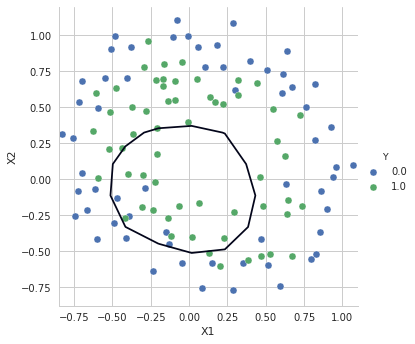

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid",color_codes=True)

sns.pairplot(x_vars="X1", y_vars="X2", hue="Y", data=df_for_regularized_reg_log,size=5)
plt.contour(all_x.ravel(),all_y.ravel(),Z_GRID,[-1e-6,1e6])

In [ ]:
# Lorsque lambda = 100 :

# on constate que la courbe de séparation des points, sépare mal les points 
# et donc qu'il y a sous-apprentissage